##  Creating an Environment 
The environment has the following functions:
 - **get_velocity** - returns an array representing the x, y velocity of the lander. Both the x and y velocity are in the range $[0, 60]$.
 - **get_angle** - returns a scalar representing the angle of the lander. The angle is in the range $[0, 359]$.
 - **get_position** -  returns an array representing the x, y position of the lander. Both the x and y position of the agent are in the range $[0, 100]$.
 - **get_landing_zone** -  returns an array representing the x, y position of the landing zone. Both the x, y coordinates are in the range $[1, 100]$. 
 - **get_fuel** - returns a scalar representing the remaining amount of fuel. Fuel starts at $100$ and is in range $[0, 100]$.
 

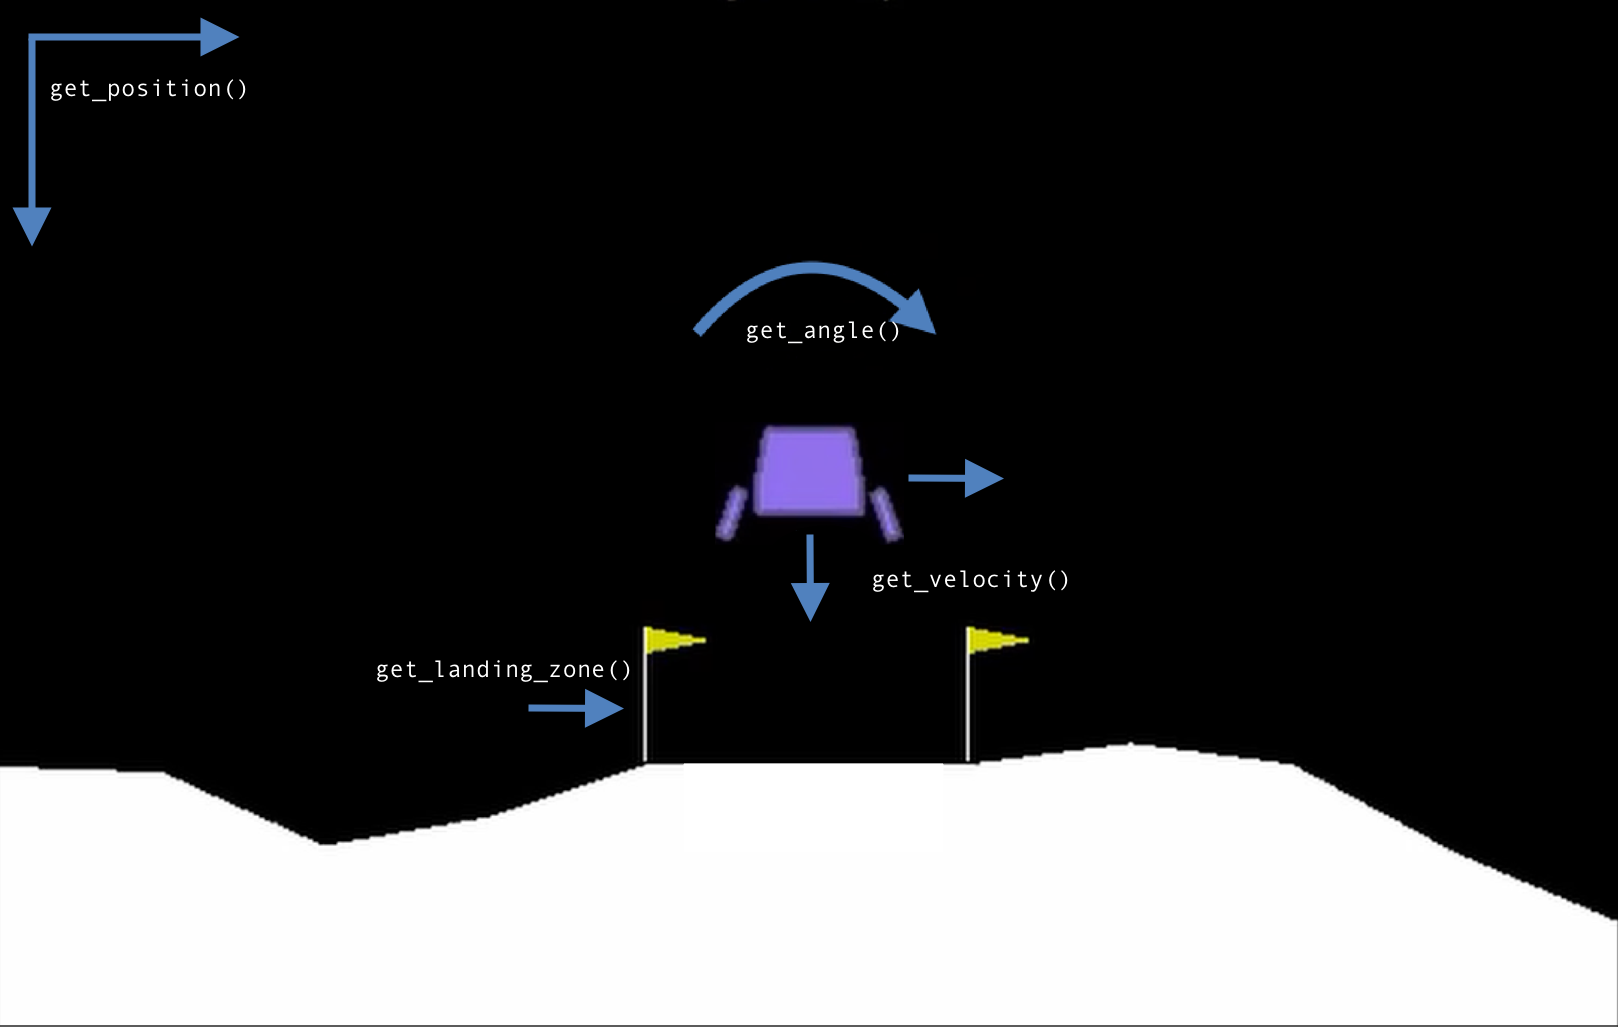


The reward signal is structured based on the following criteria:
 1. **The lander will crash if** it touches the ground when y_velocity < -3 (the downward velocity is greater than three).
 1. **The lander will crash if** it touches the ground when x_velocity < -10 or 10 < x_velocity (horizontal speed is greater than $10$).
 1. The lander's angle taken values in $[0, 359]$. It is completely vertical at $0$ degrees. **The lander will crash if** it touches the ground when 5 < angle < 355 (angle differs from vertical by more than $5$ degrees).
 1. **The lander will crash if** it has yet to land and fuel <= 0 (it runs out of fuel).
 1. The lander can only land in the landing zone. **The lander will crash if**it touches the ground when x_position $\not\in$ landing_zone (it lands outside the landing zone).

In [1]:
import environment
from utils import get_landing_zone, get_angle, get_velocity, get_fuel, get_position, tests
get_landing_zone()

class LunarLanderEnvironment(environment.BaseEnvironment):
    def __init__(self):
        self.current_state = None
        self.count = 0
        
    def env_init(self, env_info):
        self.state = np.zeros(6)
        
    def env_start(self):
        land_x, land_y = get_landing_zone()
        self.current_state = (0, 0, 0, 100, 20, land_x, land_y, 100)
        return self.current_state
    
    def env_step(self, action):
        land_x, land_y = get_landing_zone() 
        vel_x, vel_y = get_velocity(action)
        angle = get_angle(action)
        pos_x, pos_y = get_position(action)
        fuel = get_fuel(action)
        
        terminal = False
        reward = 0.0
        observation = (vel_x, vel_y, angle, pos_x, pos_y, land_x, land_y, fuel)
        
        if pos_y <= land_y:
            terminal = True
            if (vel_y < -3) or (vel_x < -10 or vel_x > 10) or (5 < angle < 355) or (pos_x != land_x):
                reward = -10000
            else:
                reward = fuel
        elif fuel <= 0:
            terminal = True
            reward = -10000
            
        self.reward_obs_term = (reward, observation, terminal)
        return self.reward_obs_term
    def env_cleanup(self):
        return None
    
    def env_message(self):
        return None

## Evaluating your reward function
Designing the best reward function for an objective is a challenging task - it is not clear what the term “best reward function” even means, let alone how to find it. Consequently, rather than evaluating your reward function by quantitative metrics, we merely ask that you check that its behavior is qualitatively reasonable. For this purpose, we provide a series of test cases below. In each case we show a transition and explain how a reward function that we implemented behaves. As you read, check how your own reward behaves in each scenario and judge for yourself whether it acts appropriately. (For the latter parts of the capstone you will use our implementation of the lunar lander environment, so don’t worry if your reward function isn’t exactly the same as ours. The purpose of this of this notebook is to gain experience implementing environments and reward functions.)

### Case 1: Uncertain Future
The lander is in the top left corner of the screen moving at a velocity of (12, 15) with 10 units of fuel — whether this landing will be successful remains to be seen.
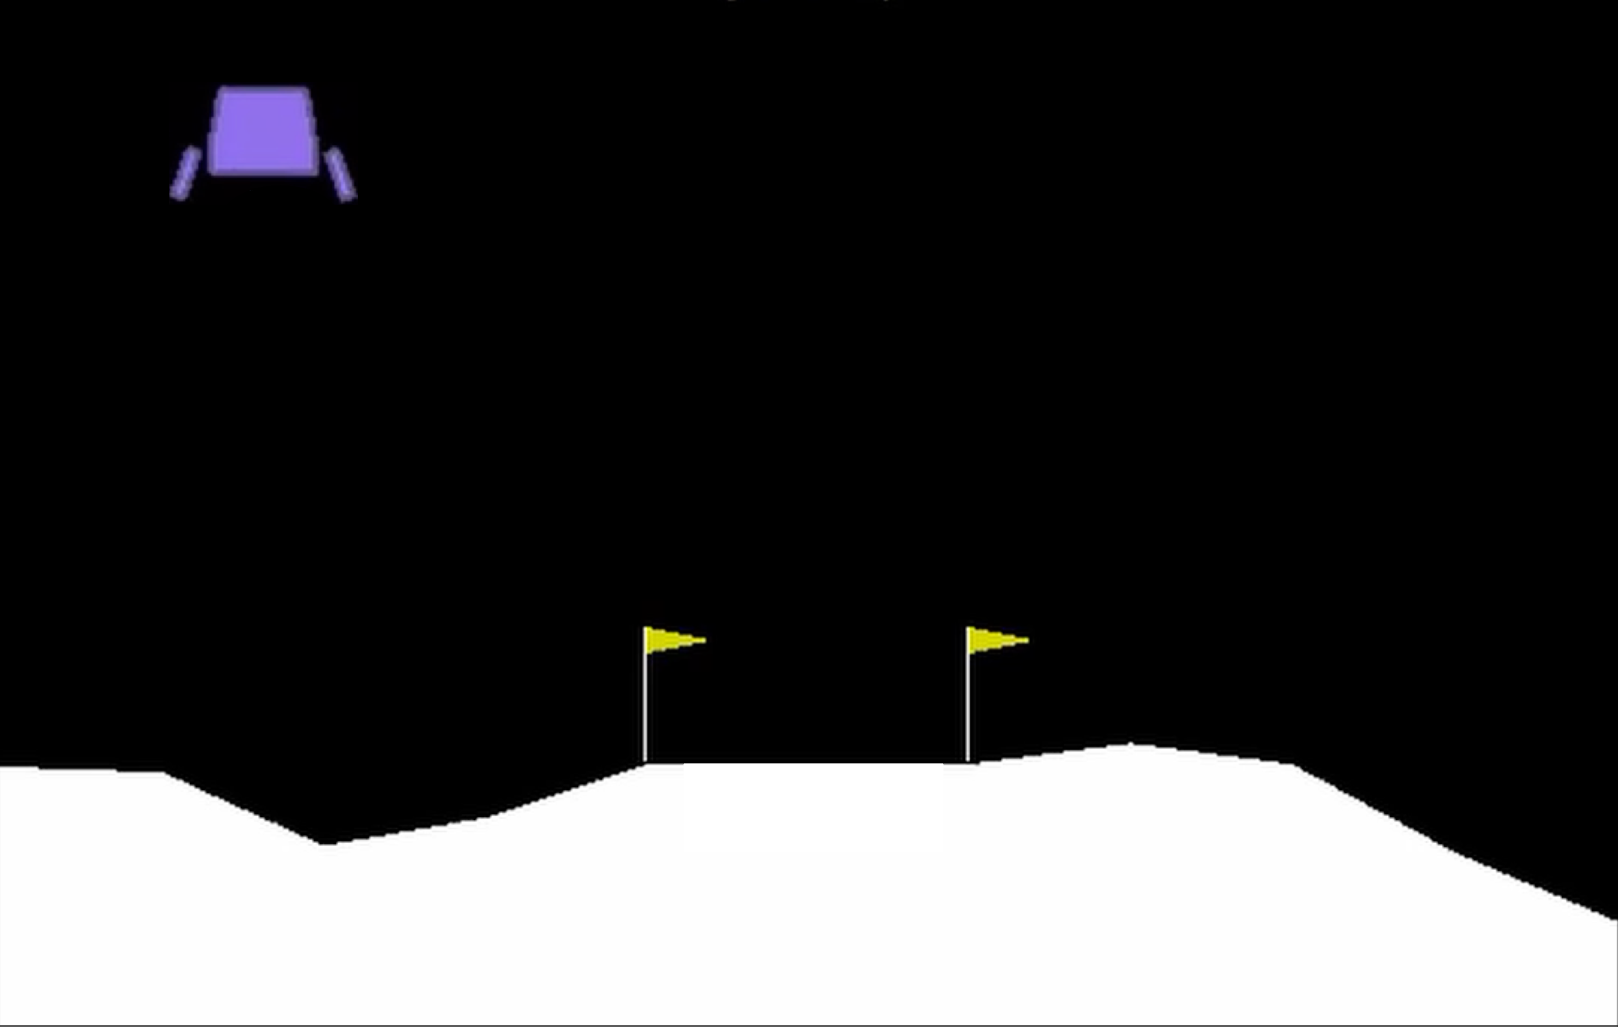

In [2]:
tests(LunarLanderEnvironment, 1)

Reward: 0.0, Terminal: False




In this case we gave the agent no reward, as it neither achieved the objective nor crashed. One alternative is giving the agent a positive reward for moving closer to the goal. Another is to give a negative reward for fuel consumption. What did your reward function do?

Also check to make sure that Terminal is set to False. Your agent has not landed, crashed, or ran out of fuel. The episode is not over.


### Case 2: Imminent Crash!

The lander is positioned in the target landing zone at a 45 degree angle, but its landing gear can only handle an angular offset of five degrees — it is about to crash!
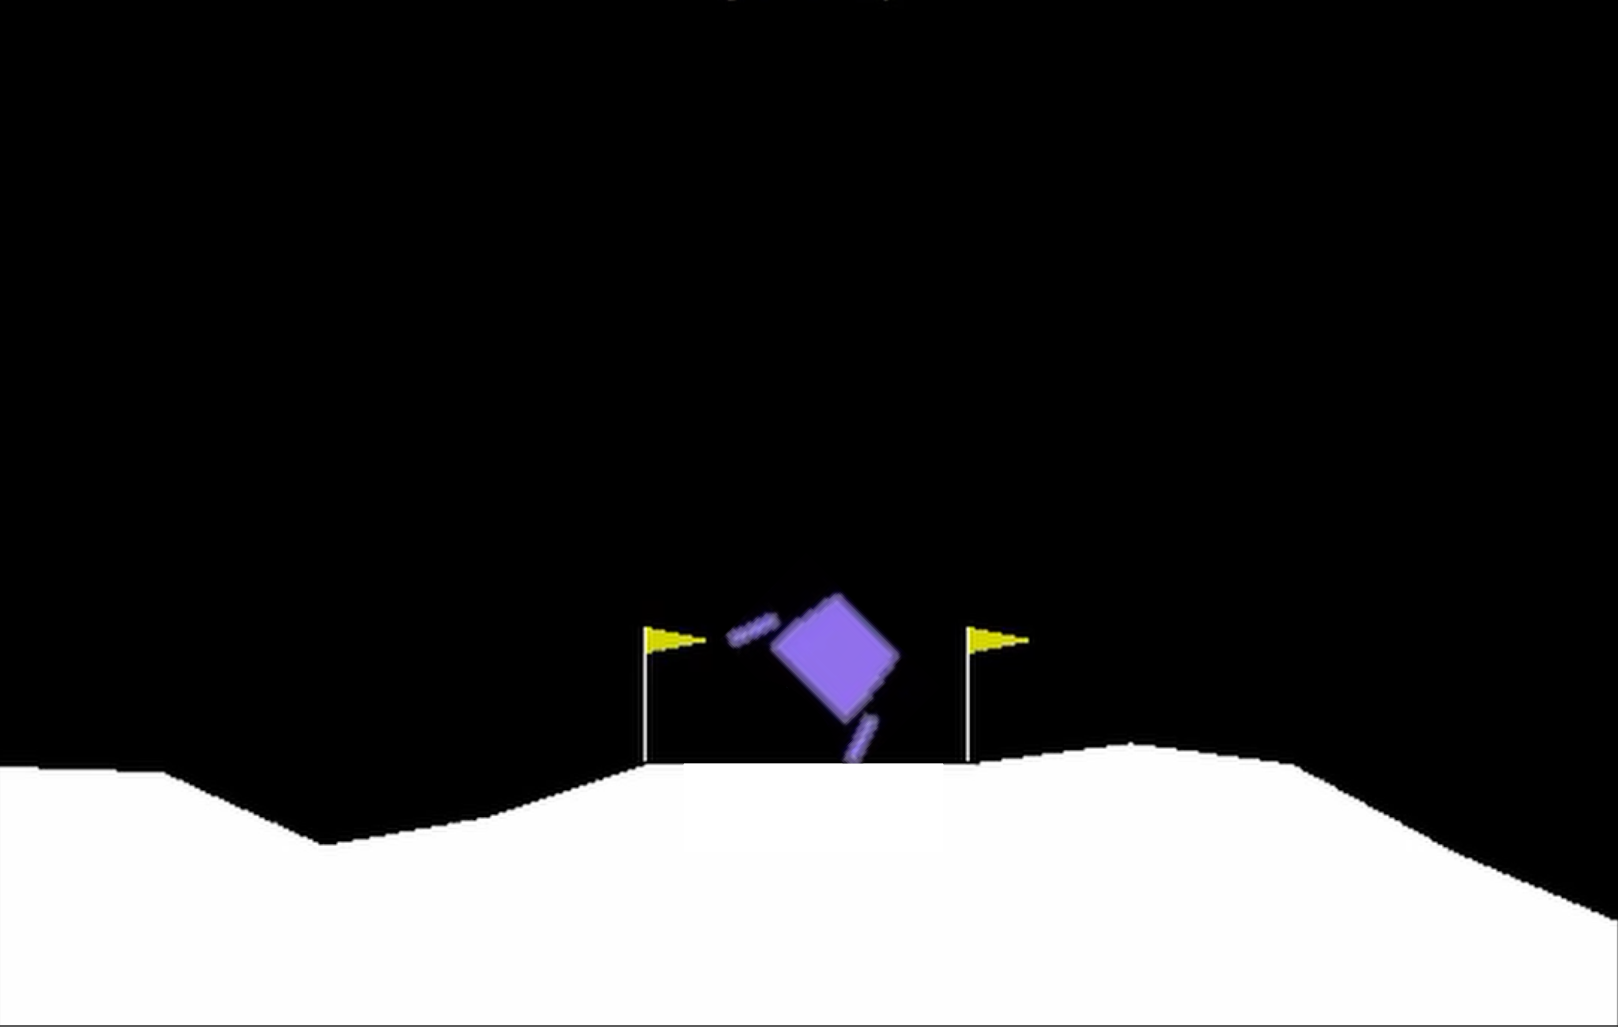

In [3]:
tests(LunarLanderEnvironment, 2)

Reward: -10000, Terminal: True


We gave the agent a reward of -10000 to punish it for crashing. How did your reward function handle the crash?

Also check to make sure that Terminal is set to True. Your agent has crashed and the episode is over.

### Case 3: Nice Landing!

The lander is vertically oriented and positioned in the target landing zone with five units of remaining fuel. The landing is being completed successfully!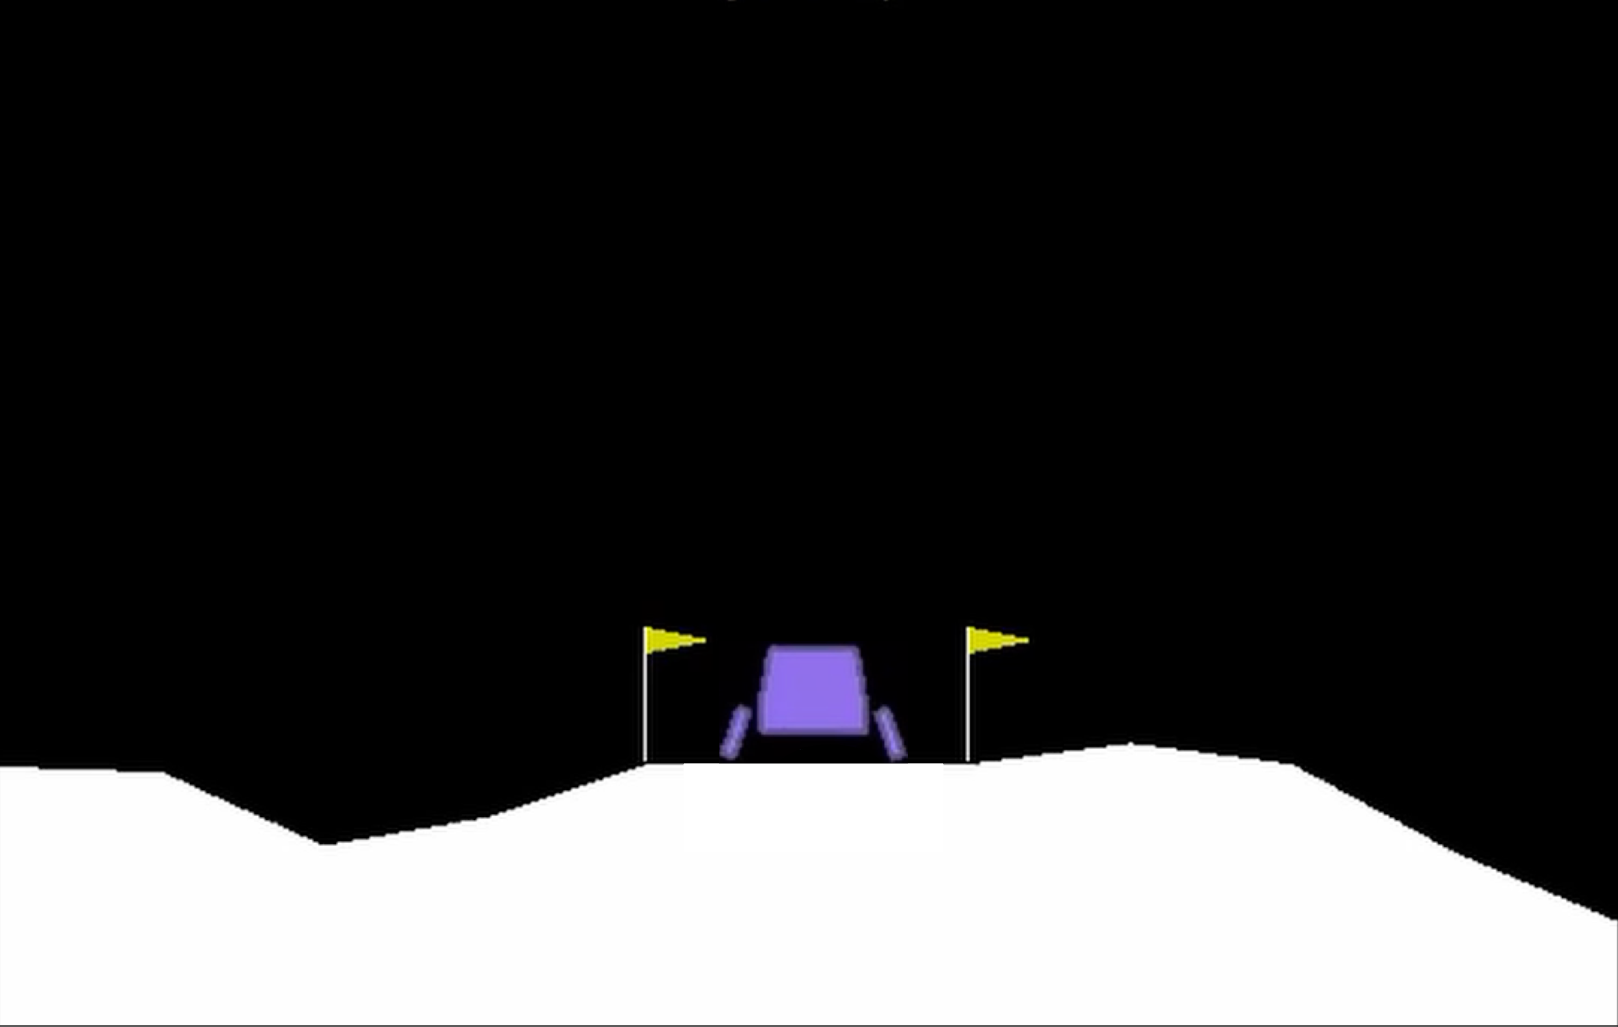

In [4]:
tests(LunarLanderEnvironment, 3)

Reward: 5, Terminal: True


To encourage the agent to conserve as much fuel as possible, we reward successful landings proportionally to the amount of fuel remaining. Here, we gave the agent a reward of five since it landed with five units of fuel remaining. How did you incentivize the agent to be fuel efficient?

Also check to make sure that Terminal is set to True. Your agent has landed and the episode is over.

### Case 4: Dark Times Ahead!

The lander is directly above the target landing zone but has no fuel left. The future does not look good for the agent — without fuel there is no way for it to avoid crashing!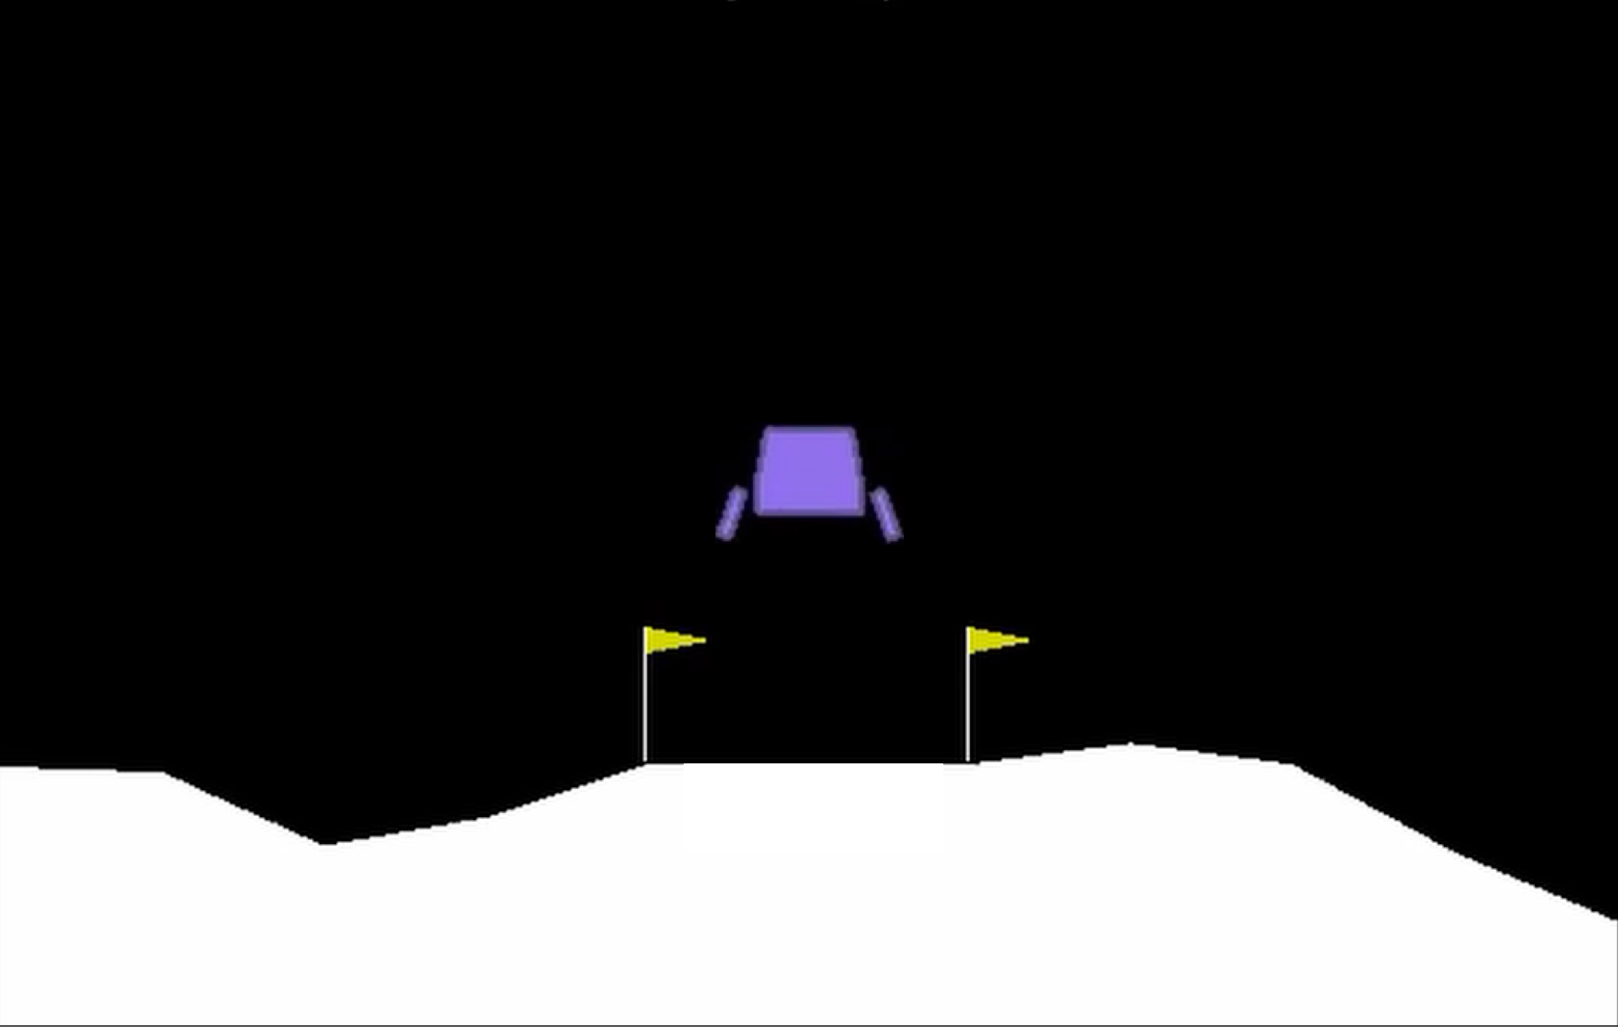

In [5]:
tests(LunarLanderEnvironment, 4)

Reward: -10000, Terminal: True


We gave the agent a reward of -10000 to punish it for crashing. Did your reward function treat all crashes equally, as ours did? Or did you penalize some crashes more than others? What reasoning did you use to make this decision?

Also check to make sure that Terminal is set to True. Your agent has crashed and the episode is over.

### Case 5: Where's The Landing Zone?!

The lander is touching down at a vertical angle with fuel to spare. But it is not in the landing zone and the surface is uneven — it is going to crash!
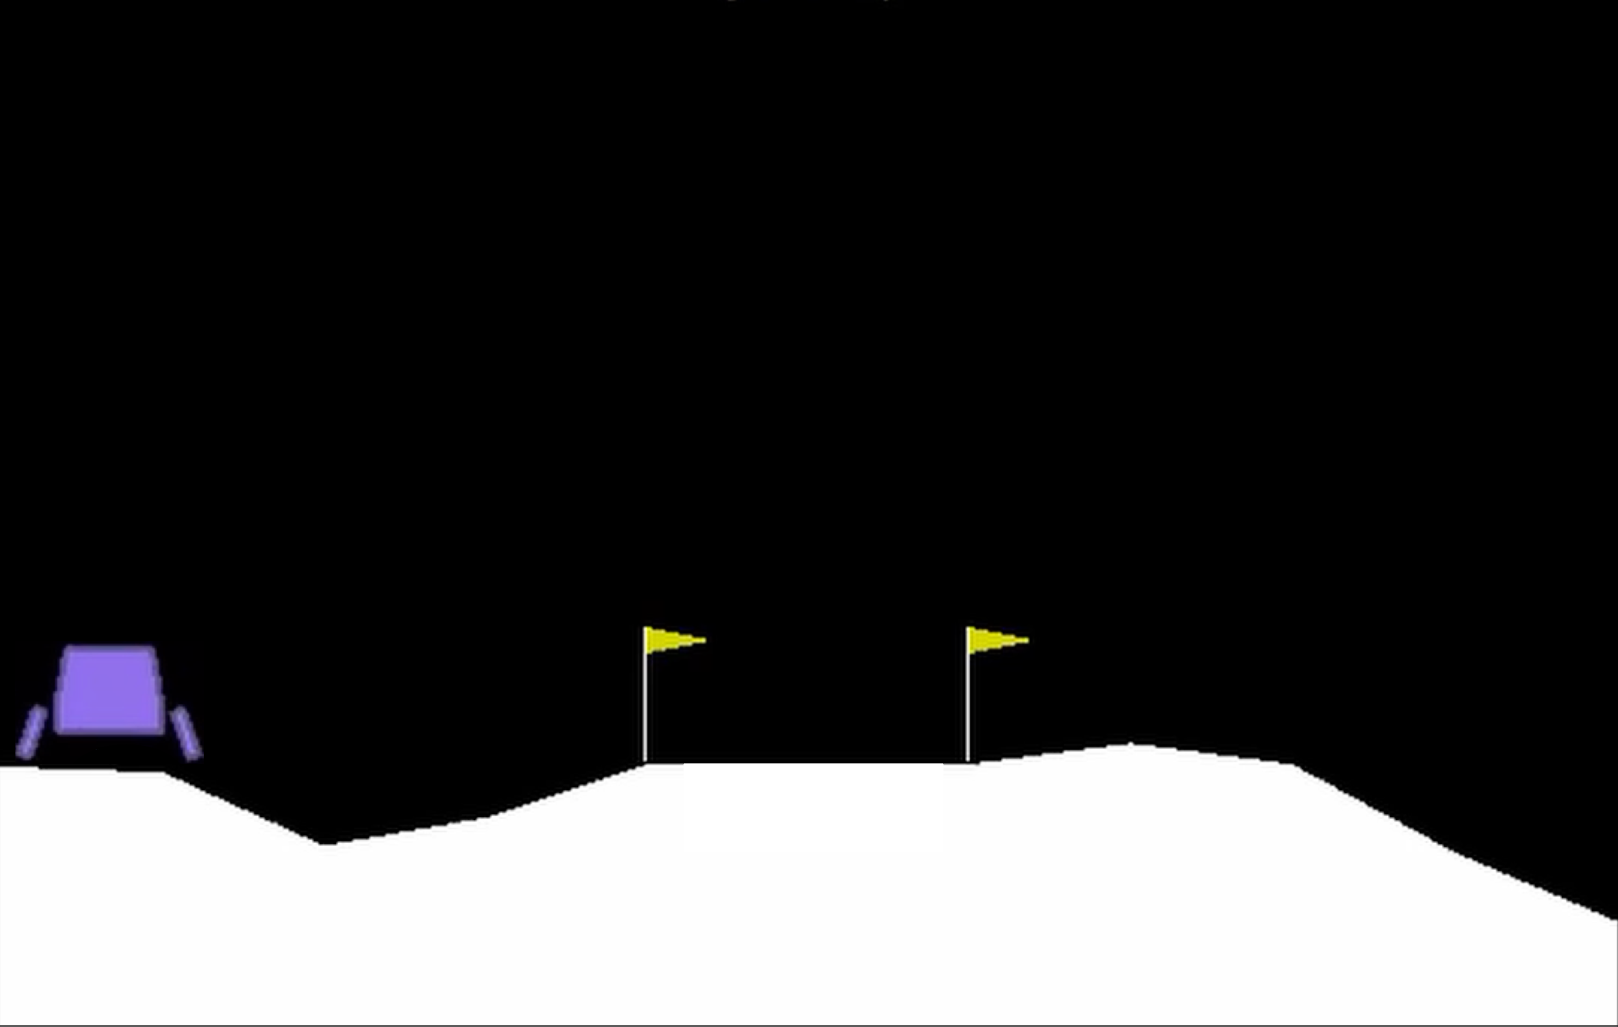

In [6]:
tests(LunarLanderEnvironment, 5)

Reward: -10000, Terminal: True


We gave the agent a reward of -10000 to punish it for landing in the wrong spot. An alternative is to scale the negative reward by distance from the landing zone. What approach did you take?

Also check to make sure that Terminal is set to True. Your agent has crashed and the episode is over.